## Explore  NYC Airbnb data - work in progress

    By Muluemebet Ayalew
       March,2020

In [1]:
#Important libraries

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew     # to calculate the skewness of numerical columns
import statsmodels.api as sm     # to graph QQplot
import re                        # to match  regular expression 
from sklearn.model_selection import train_test_split # to split the data into training and test set
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error # performance measures
%matplotlib inline

In [2]:
from scipy.stats import zscore

## 1) Get the data

In [3]:
ny= pd.read_csv("listings.csv", parse_dates=["last_review"]) # read the last_review column as datetime

In [4]:
ny.info() # information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50599 entries, 0 to 50598
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              50599 non-null  int64         
 1   name                            50582 non-null  object        
 2   host_id                         50599 non-null  int64         
 3   host_name                       50036 non-null  object        
 4   neighbourhood_group             50599 non-null  object        
 5   neighbourhood                   50599 non-null  object        
 6   latitude                        50599 non-null  float64       
 7   longitude                       50599 non-null  float64       
 8   room_type                       50599 non-null  object        
 9   price                           50599 non-null  int64         
 10  minimum_nights                  50599 non-null  int64         
 11  nu

From the above information we can see that there are mising values in the columns name, host_name, last review,reviews per month 

In [5]:
ny.shape  # the size of the dataframe

(50599, 16)

In [6]:
ny.columns  # list of column names

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
ny.head(4) # see the first 4 rows of the dataframe

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365


In [11]:
ny.describe() # summary statistics of the dataframe

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.059900e+04,5.059900e+04,50599.000000,50599.000000,50599.000000,50599.000000,50599.000000,40379.000000,50599.000000,50599.000000
mean,2.137380e+07,7.893854e+07,40.728743,-73.950762,158.171782,7.531908,24.809225,1.405862,7.330916,112.785944
std,1.242864e+07,9.095944e+07,0.055004,0.047606,348.089562,22.454271,47.317882,1.695551,32.757485,135.891028
min,2.595000e+03,2.438000e+03,40.499790,-74.247870,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.009891e+07,8.925493e+06,40.689550,-73.982930,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,2.154642e+07,3.572660e+07,40.722880,-73.955050,105.000000,3.000000,6.000000,0.740000,1.000000,42.000000
75%,3.271780e+07,1.293330e+08,40.763030,-73.934200,175.000000,5.000000,25.000000,2.110000,2.000000,225.000000
max,4.058402e+07,3.143682e+08,40.916860,-73.712990,10000.000000,1250.000000,675.000000,52.630000,310.000000,365.000000


In [109]:
ny.corr(); # correlation between numeriacl variables

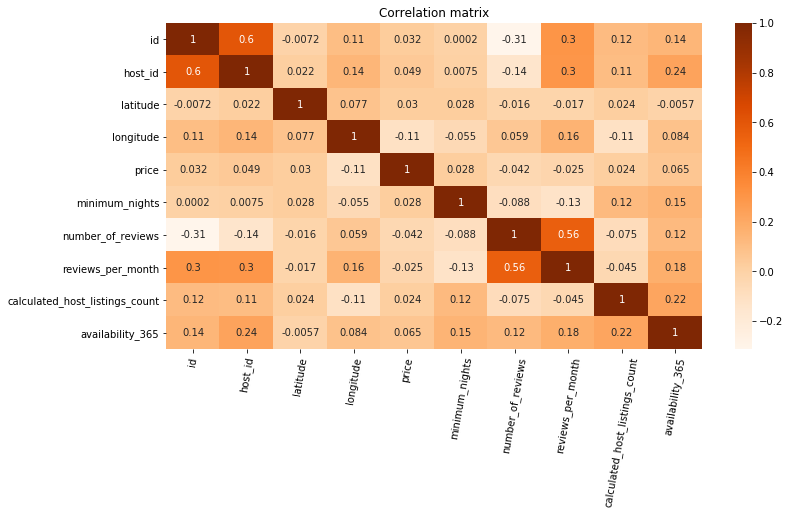

In [10]:
plt.figure(figsize=(12,6))
ny.corr() # correlation between variables 
sns.heatmap(ny.corr(), cmap="Oranges", annot=True) # heatmap of correlation 
plt.xticks(rotation=80)
plt.margins(y=0.02) # margine from the x axis (horizontal axis)
plt.title("Correlation matrix")
plt.show()


In [ ]:
np.sum(ny.loc[:,ny.isnull().any()])

## 2) Data Exploration 

- look relation between variables
- clean the data , individual columns
- what factors  determine rental  price 
- what will be the price of the the rental given its specification? is it overpriced or underpriced?
- Benefit : estimate the price for the users so that they are make sure that they got a fair price
    

### 2.1)  Analysis of predictor variables 
Let us see what information we can get from each variables. 

In [34]:
# the original column names in the dataframe
ny.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Id and Host_id

There are 38,130 unique host id. From the frequency distribution of host_id, we can learn that the frequeny is high when the host_id is lower. This may be explained as the pinior hosts get the lower id number and they are frequently hosting. However, in this analysis both id and host_id will not be included in model prediction.    

In [35]:
# number of unique id in the dataset
ny["id"].nunique()

50599

In [58]:
ny["host_id"].nunique()

38130

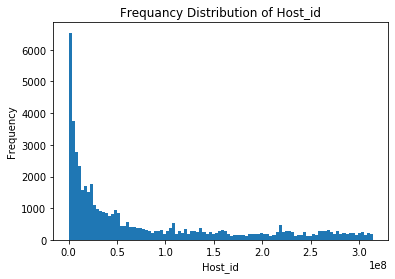

In [36]:
ny["host_id"].plot(kind="hist", bins=100) 
plt.title("Frequancy Distribution of Host_id")
plt.xlabel("Host_id")
plt.show()

### Name
The variable name contains information about listings. In some cases it looks the discription of the listing. Some listings have simialr name even if they are from different hosts. I am using some key words from the name and observed the price.  

In [37]:
print("There are {} unique names in the dataframe".format(ny["name"].nunique())) 
print("There are {a} missing names in the dataframe".format(a=ny["name"].isnull().sum()))

There are 49553 unique names in the dataframe
There are 17 missing names in the dataframe


In [38]:
ny.loc[:3,"name"] # look the first three rows to see how listings named 

0                        Skylit Midtown Castle
1              Cozy Entire Floor of Brownstone
2    Large Cozy 1 BR Apartment In Midtown East
3                              BlissArtsSpace!
Name: name, dtype: object

There are 37 listings with $10,000 per day and these datasets are outliers. Among those, 26 (about 70%) have either queen, king or full on their name. 

In [39]:
ny[ny["price"]==10000].shape[0] # there are 37 listings with $10,000 per day

37

In [40]:
# listing name containing "Queen", "King", or "Full" or "Queen ".
#to avoid unnecessary words containing "king such as walking, parking... ,Only the first letter as capital is used
 
ny.loc[(ny["name"].str.contains("Full|Queen|King", na=False)) &(ny["price"]>=10000)].shape #26

(26, 16)

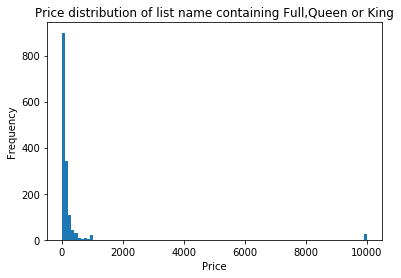

In [41]:
ny[ny["name"].str.contains("Full|Queen|King", na=False)]["price"].plot(kind="hist", bins=100)
plt.xlabel("Price")
plt.title("Price distribution of list name containing Full,Queen or King")
plt.show()

### Host_name

In [42]:
ny["host_name"].nunique() # unique host name

11605

#### Listing by the most frequent name
Michael is the most common host name in the dataset. It could be the combination of a sigle host appeared several times due to many listings and different host with similar name. 

In [44]:
# The most common unique host names in the dataset 
ny.groupby([ "host_name"])["id"].count().sort_values(ascending=False)[:5]

#or
#ny["host_name"].value_counts()

host_name
Michael         409
David           384
Sonder (NYC)    310
John            284
Alex            275
Name: id, dtype: int64

In [102]:
#Who has the most listings? A host named as Sonder (NYC) has the most listings.
ny.groupby([ "host_id","host_name"])["host_name"].count().sort_values(ascending=False)[:5]

host_id    host_name        
219517861  Sonder (NYC)         310
107434423  Blueground           263
137358866  Kaz                  120
30283594   Kara                 117
61391963   Corporate Housing     99
Name: host_name, dtype: int64

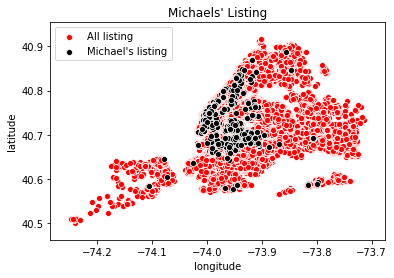

In [51]:
#listing by "Michael". The most unique host name is Michael and see where their listings are located. 
Mich= ny[ny["host_name"]=="Michael"]
sns.scatterplot("longitude", "latitude", data= ny, color="red")#,  hue="neighbourhood_group")
sns.scatterplot("longitude", "latitude", data=Mich, color= "black")
plt.title("Michaels' Listing")
plt.legend(labels=("All listing", "Michael's listing"))
plt.show()

In [8]:
Mich["price"].describe() # summary statistics 

count     409.000000
mean      162.068460
std       150.008906
min        25.000000
25%        78.000000
50%       125.000000
75%       200.000000
max      1479.000000
Name: price, dtype: float64

#### Are the listings from a host, with most listings, located in the same place?
The answer is no. Sonder (NYC) has the largest listing of 310. But all the listings are not in the same place. As it is shown in the plot. 

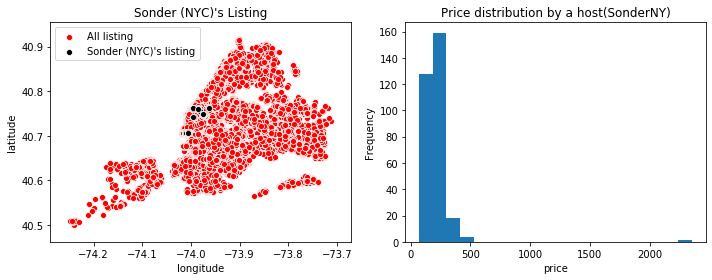

In [52]:
plt.figure(figsize=(10,4)) # set figure size
plt.subplot(1,2,1)
SonderNY= ny[ny["host_name"]=="Sonder (NYC)"] 
sns.scatterplot("longitude", "latitude", data= ny, color="red") # all other data 
sns.scatterplot("longitude", "latitude", data=SonderNY, color= "black") # listing by Sonder (NYC)
plt.title("Sonder (NYC)'s Listing")
plt.legend(labels=("All listing", "Sonder (NYC)'s listing"))

plt.subplot(1,2,2)
SonderNY["price"].plot(kind="hist", bins=20, title="Price distribution by a host(SonderNY)") # deviation of listings by a single host
plt.xlabel("price")
plt.tight_layout()
plt.show()

### Neighbourhood_group 

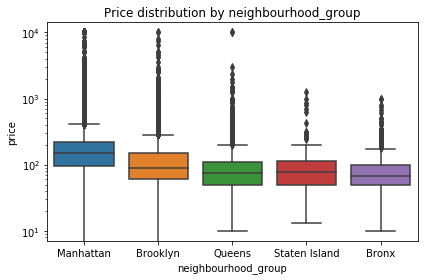

In [19]:
#box plot of price by room_type
sns.boxplot(x="neighbourhood_group",y= "price", data= ny )
plt.title("Price distribution by neighbourhood_group")
plt.yscale("log")
plt.tight_layout()

### Room type
Renting an entire home apartment is more expensive than a hotel room and private room. Shared room is the least expensive of all room types. No information about hotel renting is found in Bronx and Staten Island.


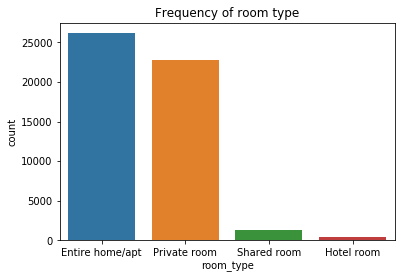

In [16]:
sns.countplot("room_type" ,data=ny)
plt.title("Frequency of room type")
plt.show()

### Average price by neighbourhood_group and room_type

Any type of room is expensive in Manhattan. When observing the entire dataset, Brooklyn is the second most expensive and Bronx is the least expensive of all. There are rooms with zero price in Manhattan and Brooklyn.

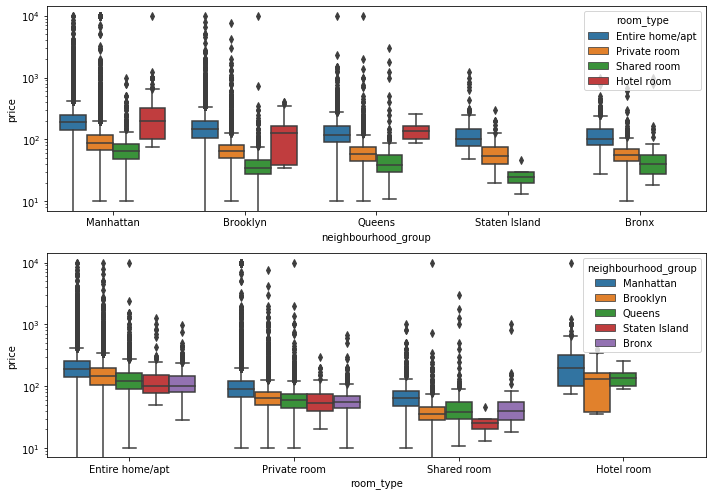

In [18]:
# box plot of price by neighbourhood_group
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.boxplot(x="neighbourhood_group",y= "price", data= ny, hue="room_type")
#plt.title("Neighbourhood_group Vs Price")
plt.yscale("log")

#box plot of price by room_type
plt.subplot(2,1,2)
sns.boxplot(x="room_type",y= "price", data= ny, hue="neighbourhood_group")
plt.yscale("log")
#plt.title("Room type Vs Price")
plt.tight_layout() # to make automatic padding  

In [ ]:
ny.groupby(by=["neighbourhood_group", "room_type"])["price"].agg(["median","mean"])\
.sort_values(by="median", ascending=False).plot(kind="bar") 


In [61]:
# median price by neighbourhood_group and room_type
ny.pivot_table(values="price", index="neighbourhood_group",columns="room_type", aggfunc="median")

#or
#ny.groupby(by=["neighbourhood_group", "room_type"])["price"].agg(["min", "max","median", "mean", "count"]).unstack("room_type")["median"]


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Bronx,100.0,NaN,55.0,40.0
Brooklyn,145.0,129.0,65.0,35.0
Manhattan,190.0,199.0,89.0,65.0
Queens,120.0,135.0,59.0,39.0
Staten Island,101.5,NaN,54.0,25.0


### Neighbourhood
There are 223 unique neighbourhoods in New York City with Airbnb listings. Based on maximum and median price, Theater district, Midtown, SoHO are the most expensive nighbourhoods.

In [85]:
ny["neighbourhood"].nunique()

223

Text(0.5, 1.0, 'Number of listings Vs Neighbourhood')

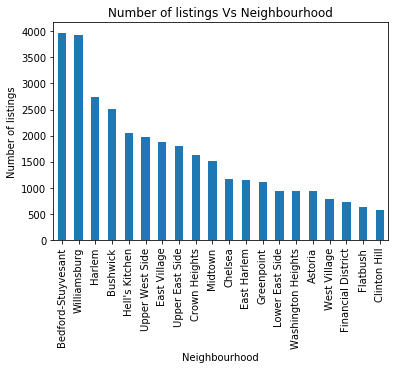

In [121]:
# neighbourhoods with most listings
ny["neighbourhood"].value_counts()[:20].plot(kind="bar") #
plt.xlabel("Neighbourhood")
plt.ylabel("Number of listings")
plt.title("Number of listings Vs Neighbourhood")


In [122]:
# neighbourhoods sorted by maximum and median listing price
print("\n\033[1m Number of Listings, Maximum, Median and Mean Price by Nighbourhoods") # \033[1m allows to print in bold 

ny.groupby("neighbourhood")["price"].agg(["max", "median", "mean", "count"])\
.sort_values(by= ["max", "median"],ascending=False)[:10]


 Number of Listings, Maximum, Median and Mean Price by Nighbourhoods


,max,median,mean,count
neighbourhood,,,,
Theater District,10000,205.0,690.763754,309
Midtown,10000,200.0,320.694079,1520
SoHo,10000,198.5,369.238764,356
Hell's Kitchen,10000,172.5,220.000000,2052
Upper West Side,10000,150.0,208.209889,1982
Lower East Side,10000,143.0,256.518008,944
Chinatown,10000,129.0,225.938830,376
Manhattan Beach,10000,127.5,1098.800000,10
Greenpoint,10000,120.0,150.728261,1104


### Latitude and Longitude 

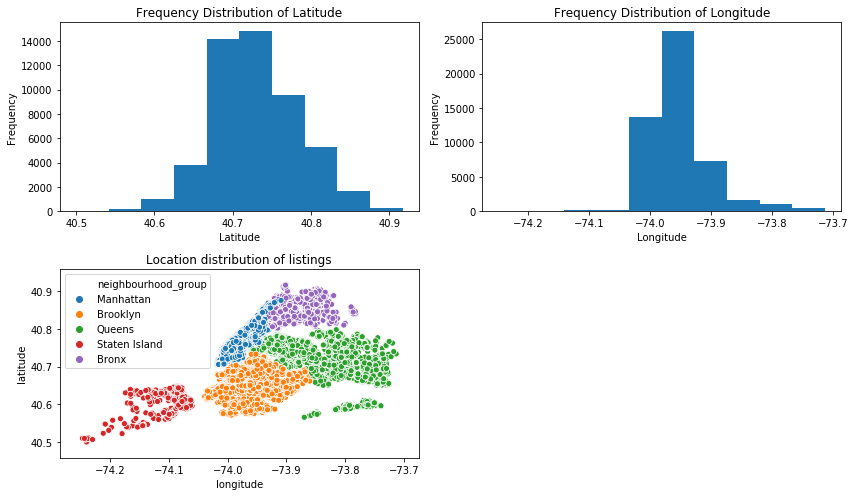

In [123]:
#distribution of latitude
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
ny["latitude"].plot(kind="hist", title="Frequency Distribution of Latitude")
plt.xlabel("Latitude")

#distribution of Longitude
plt.subplot(2,2,2)
ny["longitude"].plot(kind="hist", title="Frequency Distribution of Longitude")
plt.xlabel("Longitude")

# scatterplot of longitude and latitude
plt.subplot(2,2,3)
sns.scatterplot(x="longitude", y= "latitude", hue="neighbourhood_group", data=ny)
plt.title("Location distribution of listings")
plt.tight_layout()

### Minimum_nights
It is highly skewed. Its value ranges from one night to 1250 nights and its relation with price doesn't look linear as we can see from the joint plot

In [124]:
ny["minimum_nights"].describe() # summary statistics of minimum_nights column

count    50599.000000
mean         7.531908
std         22.454271
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [126]:
skew(ny["minimum_nights"]) # the data is very skewed

20.946817988271725

Text(0.5, 0, 'Minimum_nights')

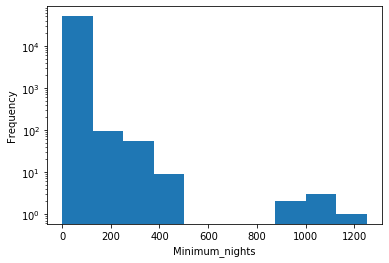

In [156]:
ny["minimum_nights"].plot(kind="hist")
plt.yscale("log") # log scale
plt.xlabel("Minimum_nights")

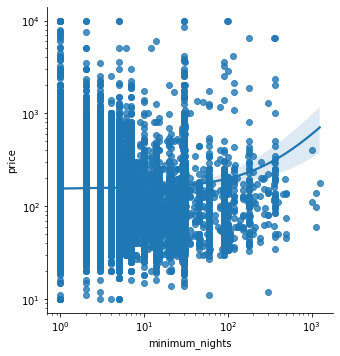

In [166]:
sns.lmplot(x= "minimum_nights", y="price", data=ny)
plt.xscale("log")
plt.yscale("log")

### Number of Review

In [150]:
ny['number_of_reviews'].describe()

count    50599.000000
mean        24.809225
std         47.317882
min          0.000000
25%          1.000000
50%          6.000000
75%         25.000000
max        675.000000
Name: number_of_reviews, dtype: float64

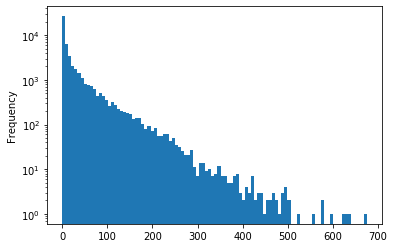

In [11]:
ny['number_of_reviews'].plot(kind="hist", bins=100)
plt.yscale("log")

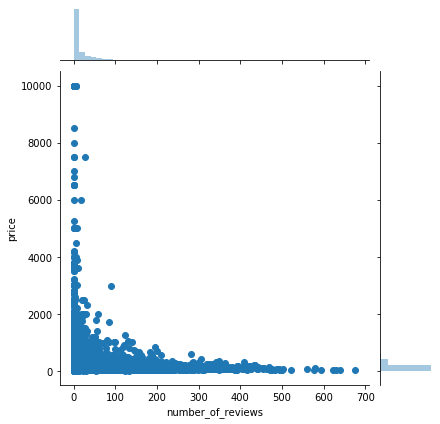

In [151]:
sns.jointplot(x= "number_of_reviews", y="price", data=ny)

### Last_review

Most review was writen by guestes during the year 2019. The most recent review was given in the month of November.

In [152]:
ny.groupby(ny["last_review"].dt.year)["price"].max()

last_review
2011.0      299
2012.0      700
2013.0      375
2014.0      700
2015.0     9999
2016.0    10000
2017.0    10000
2018.0     8500
2019.0    10000
Name: price, dtype: int64

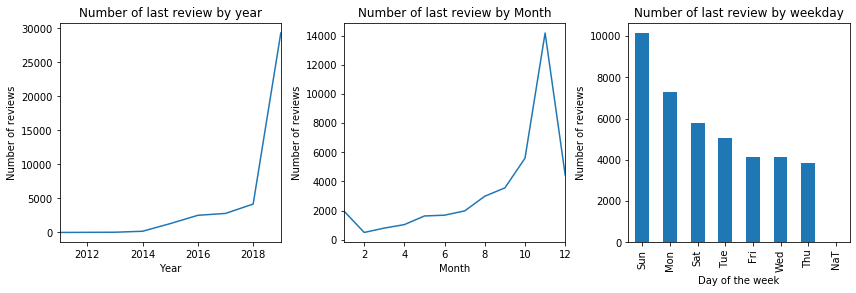

In [166]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
#group the data by last_review year  and count it 
ny.groupby(ny["last_review"].dt.year)["last_review"].count().plot(title="Number of last review by year")
plt.ylabel("Number of reviews")
plt.xlabel("Year")
plt.title

plt.subplot(1,3,2)
# group the data by last_review month  and count it 
ny.groupby(ny["last_review"].dt.month)["last_review"].count().plot(title="Number of last review by Month")
plt.ylabel("Number of reviews")
plt.xlabel("Month")
plt.tight_layout()

# number of review by weekday in decreasing order
plt.subplot(1,3,3)
ny.groupby(ny["last_review"].dt.strftime("%a"))["last_review"].count().sort_values(ascending=False ).plot(kind="bar")
plt.ylabel("Number of reviews")
plt.xlabel("Day of the week")
plt.title("Number of last review by weekday")
plt.show()


Text(0.5, 1.0, 'Number of review by year and neighbourhood group')

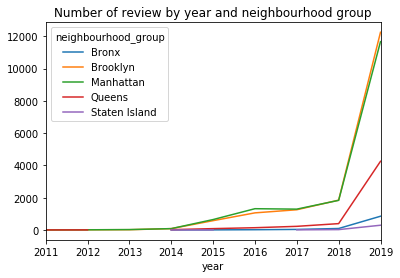

In [171]:
# Where is most review come from
ny["year"]= ny["last_review"].dt.year # create a separate column for year
ny.pivot_table(index="year", columns="neighbourhood_group",values= "id", aggfunc="count" ).plot()
plt.title("Number of review by year and neighbourhood group")
ny.drop("year", axis=1, inplace=True) # delete the year column
plt.show()

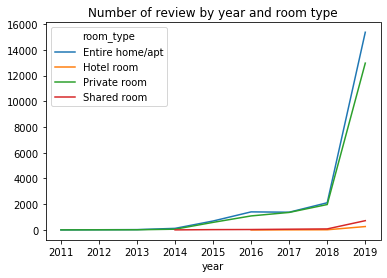

In [124]:
# which room type get most review
ny["year"]= ny["last_review"].dt.year # create a separate column for year
ny.pivot_table( index="year", columns="room_type" ,values= "id", aggfunc="count").plot()
plt.title("Number of review by year and room type")
plt.show()
ny.drop("year", axis=1, inplace=True) # delete the year column

(735599.0, 737060.0)

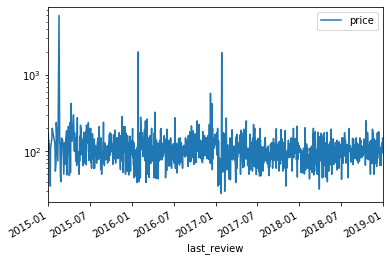

In [132]:
ny["year"]= ny["last_review"].dt.year # create a separate column for year
ny.pivot_table( index="last_review", values= "price", aggfunc="median").plot()
ny.drop("year", axis=1, inplace=True) # delete the year column
plt.yscale("log")
plt.xlim(["2015","2019"])

In [12]:
sns.lm

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Reviews per month 

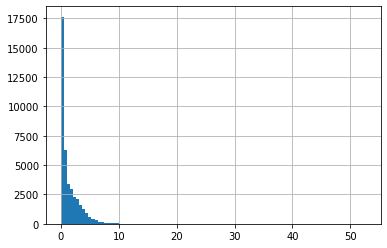

In [15]:
ny.reviews_per_month.hist(bins=100)

In [16]:
ny.reviews_per_month.describe()

count    40379.000000
mean         1.405862
std          1.695551
min          0.010000
25%          0.190000
50%          0.740000
75%          2.110000
max         52.630000
Name: reviews_per_month, dtype: float64

### Availablity 365

In [284]:
ny.availability_365.describe()

count    50583.000000
mean       112.771998
std        135.890353
min          0.000000
25%          0.000000
50%         42.000000
75%        225.000000
max        365.000000
Name: availability_365, dtype: float64

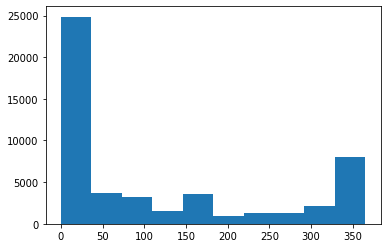

In [289]:
_=plt.hist(ny.availability_365)

In [281]:
a360= ny[ny["availability_365"]<=10]  # busy most of the time

In [282]:
anot= ny[ny["availability_365"]>=260] # not busy

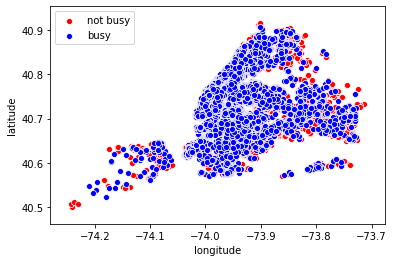

In [293]:
sns.scatterplot("longitude", "latitude", data= anot, color="red") # not busy area
sns.scatterplot("longitude", "latitude", data= a360, color="blue") # busy area

plt.legend(loc="upper left", labels=["not busy", "busy"])

### 2.2)  Exploring Price - the dependent variable
The price is skewed to the right. It ranges from zero to ten thousand. One reason for zero prized listing could be to indicate listing as inactive and intentionally left as zero price. There could also be other reasons. In any case, including the zero price in the model might be misleading, therefore only the non-zero priced listings will be considered for the analysis. 

In [174]:
ny["price"].describe() # summary statistics for price(number of observation, mean, min, max, standard deviation and etc.)

count    50599.000000
mean       158.171782
std        348.089562
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

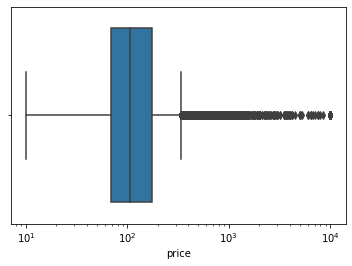

In [280]:
sns.boxplot("price", data=ny, orient="H")
plt.xscale("log")

In [175]:
skew(ny["price"]) # the price is highly skewed

21.2696714245641

In [177]:
# skiwness of the numerical columns
ny.skew(axis= 0, skipna=True) # the price is highly skewed

id                                -0.074832
host_id                            1.146152
latitude                           0.238889
longitude                          1.311845
price                             21.270302
minimum_nights                    20.947439
number_of_reviews                  3.685326
reviews_per_month                  2.702944
calculated_host_listings_count     7.652667
availability_365                   0.808513
dtype: float64

Text(0.5, 0, 'Price')

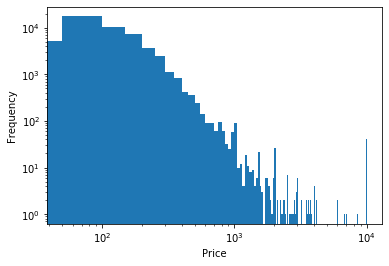

In [5]:
# histogram of price with log scale of x and y axis 
ny["price"].plot(kind="hist", logx=True, logy=True, bins=200)
plt.xlabel("Price")

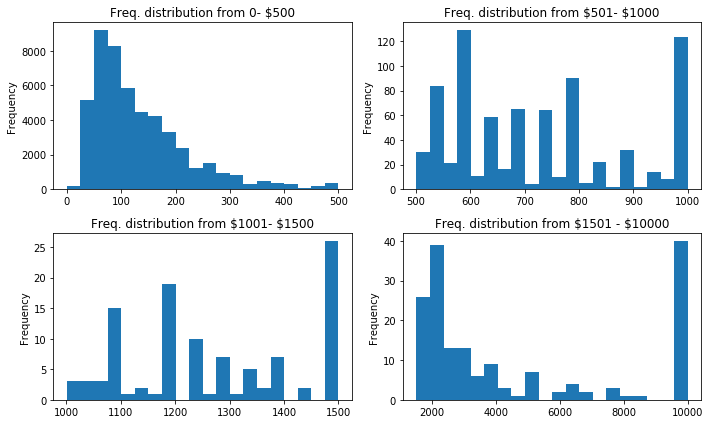

In [7]:
# zoom and look at the price distribution with differnt price range
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
ny["price"].plot( kind="hist", bins=20, range=(0,500), title="Freq. distribution from 0- $500")

plt.subplot(2,2,2)
ny["price"].plot( kind="hist", bins=20, range=(501,1000), title="Freq. distribution from $501- \$1000")

plt.subplot(2,2,3)
ny["price"].plot( kind="hist", bins=20, range=(1001,1500),title="Freq. distribution from $1001- \$1500")

plt.subplot(2,2,4)
ny["price"].plot( kind="hist", bins=20, range=(1501,10000),title="Freq. distribution from $1501 - \$10000")
plt.tight_layout()

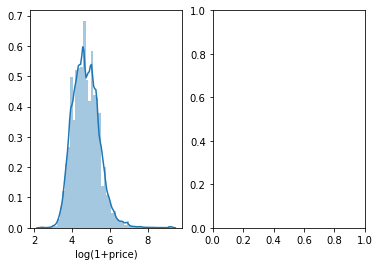

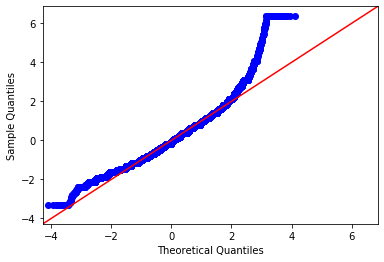

In [160]:
real=ny[ny["price"]>0]
plt.subplot(1,2,1)
sns.distplot(np.log1p(real['price'])) # distribution plot after log transformation 
plt.xlabel('log(1+price)')

plt.subplot(1,2,2)
sm.qqplot(np.log1p(real['price']),  fit=True, line='45');


In [182]:
# comput the emprical comulative distribution function 
def ecdf(data):
    x= np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return x,y

Text(0.5, 1.0, 'Theoretical Vs actual distribution')

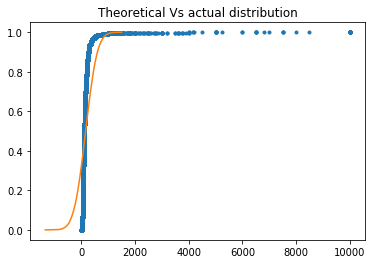

In [65]:
# The price is not normally distributed , original data

sample= np.random.normal(loc=ny.price.mean(), scale=np.std(ny.price, ddof=1),size=50000)
x_theor, y_theor= ecdf(sample)
x,y= ecdf(ny.price)
_=plt.plot(x,y, marker=".", linestyle="none")
_=plt.plot(x_theor,y_theor)
plt.title("Theoretical Vs actual distribution")

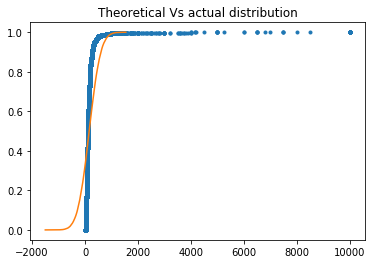

In [64]:
#The price is not normally distributed, cleaned data
sample= np.random.normal(loc=new_ny.price.mean(), scale=np.std(new_ny.price, ddof=1),size=50000)
x_theor, y_theor= ecdf(sample)
x,y= ecdf(new_ny.price)
_=plt.plot(x,y, marker=".", linestyle="none")
_=plt.plot(x_theor,y_theor)
_=plt.title("Theoretical Vs actual distribution")



Text(0.5, 1.0, 'Theoretical Vs actual distribution')

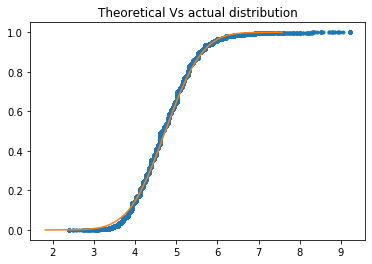

In [81]:
#The price is not normally distributed, cleaned data,logtransformation 
logp=np.log1p(new_ny.price)
#plt.hist(logp, density=True)
sample= np.random.normal(loc=logp.mean(), scale=np.std(logp, ddof=1),size=50000)
x_theor, y_theor= ecdf(sample)
x,y= ecdf(logp)
_=plt.plot(x,y, marker=".", linestyle="none")
_=plt.plot(x_theor,y_theor)
plt.title("Theoretical Vs actual distribution")

In [77]:
meanp= new_ny.price.mean()
stdp= new_ny.price.std()
no_outlierp= new_ny.price[new_ny.price<(meanp+(3*stdp))]

In [78]:
no_outlierp.shape

(50352,)

Text(0.5, 1.0, 'Theoretical Vs actual distribution')

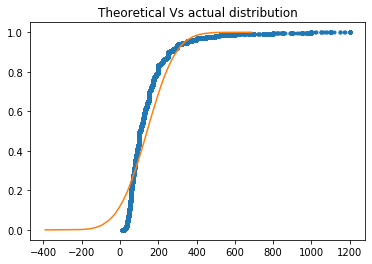

In [80]:
# cleaned data, outliers removed 

#plt.hist(no_outlierp)
sample= np.random.normal(loc=no_outlierp.mean(), scale=np.std(no_outlierp, ddof=1),size=50000)
x_theor, y_theor= ecdf(sample)
x,y= ecdf(no_outlierp)
_=plt.plot(x,y, marker=".", linestyle="none")
_=plt.plot(x_theor,y_theor)
plt.title("Theoretical Vs actual distribution")

In [50]:
new_ny.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,is_hotel,dist_nearest_SubwayStation,dist_nearest_SubwayEntrance,dist_from_TimeSqr,dist_from_PennStation
count,5.058300e+04,5.058300e+04,50583.000000,50583.000000,50583.000000,50583.000000,50583.000000,50583.000000,50583.000000,50583.000000,50583.000000,50583.000000,50583.000000,50583.000000,50583.000000
mean,2.137178e+07,7.893029e+07,40.728748,-73.950763,158.221814,7.531878,24.808888,1.121688,7.332147,112.771998,0.010695,0.482705,0.409009,7.241316,7.227984
std,1.242899e+07,9.095542e+07,0.055010,0.047610,348.133242,22.457003,47.318557,1.616328,32.762568,135.890353,0.102865,0.853043,0.587941,4.523071,4.516229
min,2.595000e+03,2.438000e+03,40.499790,-74.247870,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000906,0.000891,0.009161,0.031538
25%,1.009678e+07,8.924880e+06,40.689545,-73.982930,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.203961,0.168371,3.914220,3.774904
50%,2.154779e+07,3.570849e+07,40.722880,-73.955050,105.000000,3.000000,6.000000,0.380000,1.000000,42.000000,0.000000,0.315723,0.281015,6.519223,6.947070
75%,3.271741e+07,1.293330e+08,40.763040,-73.934225,175.000000,5.000000,25.000000,1.650000,2.000000,225.000000,0.000000,0.474173,0.439495,9.564444,9.418448
max,4.058402e+07,3.143682e+08,40.916860,-73.712990,10000.000000,1250.000000,675.000000,52.630000,310.000000,365.000000,1.000000,21.986259,7.888548,36.039994,34.818868


## 3) Data cleaning 
### 3.1) Missing Values 

The variables 'name', 'host_name', 'last_review' and 'reviews_per_month' have missing value. The first three variables will not be included in the model as their importnace for price predication is consided low. Whereas the last variable, 'reviews_per_month', is filled by zero beacuse the missingness was due to the fact that the listings have no review in the first place. 

In [98]:
# returns column names those have NaN
nan_col=ny.loc[:, ny.isnull().any()].columns 
print(nan_col)

Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')


In [99]:
# columns with number of missing values 
np.sum(ny[nan_col].apply(lambda x: x.isnull()))

name                    17
host_name              563
last_review          10220
reviews_per_month    10220
dtype: int64

In [106]:
#fill na by zero
ny["reviews_per_month"].fillna(0,inplace=True)  

In [107]:
# check if there is any missing value
ny["reviews_per_month"].isnull().any()

False

### 3.2) Bad Record  
As it is noted earlier, the price has zero value. Including those data in the analysis might be misleading. Therefore, only prices with values greator than zero are extracted. 

In [108]:
ny= ny[ny["price"]>0] # take only the dataframe with non zero price

In [109]:
ny.shape  # 16 rows are excluded 

(50583, 16)

## 4) Feature Engineering 

- craft new features 
    - from the existing data 
        - is listing hotel? 
    - from external data
        - distance from TimeSquare, 
        - distance from nearest subway entrance
        - distance from Penn Station 
        
- Feature encoding, creating dummy for neighbourhood_group and room_type and target encoding for neighbourhoods column
- Ignore zero priced listing from the analysis 
- Remove outlier price 

The following variables were chosen as predictor variables from the original dataset:
'neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'. 

Latitude and longitude information will be used indirectly to compute the distance from point of interest and are not included as predictor variables.        

### 4.1) Crafting new feature from the listing data  
###   Add a new feature is_hotel
The data contains information about room type, Whether it is the entire home/apartment, private room, shared room or hotel room. However, there are hotel listings that are not specified as hotel room. In some cases, they are listed as private rooms and in other cases entire home/apartment. A new variable is created to distinguish a listing as hotel or non hotel. To do this,  hosting names containing the word hotel and listings listed as hotel rooms are labeled as hotel and the rest as none hotel.So that we can have deeper granularity. But this data has to be verified from Airbnb if they have detailed information about the host type. 


**Let us explore the hosting name containing the word hotel and categorized as hotel room or not**  

In [54]:
# Host name that contains "hotel", 246 in number
print("Host name that contains the word 'hotel': {} in number"\
      .format(ny[ny["host_name"].str.lower().str.contains("hotel", na=False)].shape[0])) 

# Host listed as Hotel room , 417 in number 
print("Host listed as Hotel room: {} in number ".format(ny[ny["room_type"]=='Hotel room'].shape[0]))  #(417, 16)

#Host listed as hotel room and has "hotel" on its name, 122 in number 
print("Host listed as hotel room and has 'hotel' on its name: {} in number" \
      .format(ny[(ny["room_type"]=='Hotel room')& (ny["host_name"].str.lower().str.contains("hotel", na=False)) ].shape[0])) 
                                                                                      
#Host listed as none hotel room and has "hotel" on its name, 124 in number
print("Host listed as none hotel room and has 'hotel' on its name, {} in number"\
      .format(ny[(ny["room_type"]!='Hotel room') & (ny["host_name"].str.lower().str.contains("hotel", na=False)) ].shape[0]))


Host name that contains the word 'hotel': 246 in number
Host listed as Hotel room: 417 in number 
Host listed as hotel room and has 'hotel' on its name: 122 in number
Host listed as none hotel room and has 'hotel' on its name, 124 in number


In [111]:
# select hosts containing "hotel" on its name or listed as hotel room 
hotel= ny[(ny["room_type"]=='Hotel room') | (ny["host_name"].str.lower().str.contains("hotel", na=False))]


In [115]:
hotel_cpy= hotel.copy() # copy the sliced data

In [116]:
# create "is_hotel" column and label as 1
hotel_cpy["is_hotel"]= 1

In [117]:
hotel_cpy.columns; # is_hotel is aded as a new column 

In [118]:
hotel_cpy.shape # the shape of the datafram containing hotel listings

(541, 17)

In [119]:
# merge hotel dataframe and the original dataframe
nyh= pd.merge(ny, hotel_cpy, how="outer")
nyh["is_hotel"].fillna(value=0, inplace=True) # fill NaN with 0 to refer not hotel and update the dataframe 

In [120]:
nyh["is_hotel"].value_counts()# there are only 541 hotel listings.

0.0    50042
1.0      541
Name: is_hotel, dtype: int64

In [121]:
# count the number of listings for hotel and non hotel by room type
nyh.pivot_table(index= "is_hotel", columns="room_type", values="id", aggfunc="count")#["ro"]

room_type,Entire home/apt,Hotel room,Private room,Shared room
is_hotel,,,,
0.0,26116.0,NaN,22672.0,1254.0
1.0,17.0,417.0,107.0,NaN


### 4.2) Craft new features using external data

Other than the given features in the listing dataset, it might be helpful to have more information about the listings. For example distance from nearest subway station/station entrance/, distance from attraction places and distance from rail station(Pennsylvania Station(NYC)) might determine the price of the listing. Therefore, those information are gathered, calculated and merged to the listing data. 

### Subway  Station Data
The subway data contains information about the name of the subwaystation , its geographic location, line, notes and url link. Since the location information has strings, we need to clean and get only the number.

In [122]:
sbstation= pd.read_csv("SUBWAY_STATION.csv") # subway station data, 473 stations

In [123]:
sbstation.head(3) # look at the dataframe

,URL,OBJECTID,NAME,the_geom,LINE,NOTES
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,"1-all times, 2-nights"


In [125]:
# Extract only location information(longitude and latitude ) using regular expression
# Clean the geom entry and take only numbers indicating the latitude and longitude 
pattern= re.compile("\-?\d+\.\d*") # compile regular expression pattern
sbstation["location"]= sbstation["the_geom"].apply(lambda x: re.findall(pattern, x))
sbstation["long"]=sbstation["location"].apply(lambda x: float(x[0]))  # get the longitude
sbstation["lat"]=sbstation["location"].apply(lambda x: float(x[1]))    #get the latitude

In [126]:
sbstation[["the_geom", "long", "lat"]].head(2) # look at the extracted latitude and longitude

,the_geom,long,lat
0,POINT (-73.99106999861966 40.73005400028978),-73.991070,40.730054
1,POINT (-74.00019299927328 40.71880300107709),-74.000193,40.718803


### Subway  Entrance Data 

In [128]:
sb_entrnc= pd.read_csv("SUBWAY_ENTRANCE.csv") # subway entrance data

In [129]:
sb_entrnc.head(3)

,OBJECTID,URL,NAME,the_geom,LINE
0,1734,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NW corner,POINT (-73.86835600032798 40.84916900104506),2-5
1,1735,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NE corner,POINT (-73.86821300022677 40.84912800131844),2-5
2,1736,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.87349900050798 40.84122300105249),2-5


In [130]:
# Clean the geom entry and take only numbers indicating the latitude and longitude 
ptrn= re.compile("\-?\d+\.\d*") # compile regular expression pattern

sb_entrnc["location"]= sb_entrnc["the_geom"].apply(lambda x: re.findall(ptrn, x)) # add longitude and latitude info
sb_entrnc["long"]=sb_entrnc["location"].apply(lambda x: float(x[0]))
sb_entrnc["lat"]=sb_entrnc["location"].apply(lambda x: float(x[1]))

In [131]:
sb_entrnc[["the_geom", "long", "lat"]].head(2) # check longitude and latitude 

,the_geom,long,lat
0,POINT (-73.86835600032798 40.84916900104506),-73.868356,40.849169
1,POINT (-73.86821300022677 40.84912800131844),-73.868213,40.849128


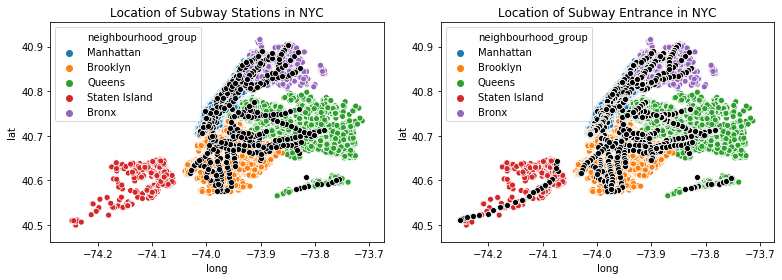

In [132]:
plt.figure(figsize=(11,4)) # adjust figure size
plt.subplot(1,2,1)
sns.scatterplot("longitude", "latitude", data= ny, color="red",  hue="neighbourhood_group")
sns.scatterplot("long", "lat", data=sbstation, color="black")  # maping subwaystation 
plt.legend(loc="upper left")
plt.title("Location of Subway Stations in NYC")

plt.subplot(1,2,2)
sns.scatterplot("longitude", "latitude", data= ny, color="red",  hue="neighbourhood_group")
sns.scatterplot("long", "lat", data=sb_entrnc, color="black")  # maping subwaystation entrance
plt.legend(loc="upper left")
plt.title("Location of Subway Entrance in NYC")
plt.tight_layout()
plt.show()

In [133]:
print("Number of subway entrance in NYC, ", sb_entrnc.shape[0])
print("Number of subway stations in NYC, ", sbstation.shape[0])
print("Intersection of station and entrance data, " , pd.concat([sb_entrnc,sbstation], join="inner", axis=1).shape[0])  #473


Number of subway entrance in NYC,  1928
Number of subway stations in NYC,  473
Intersection of station and entrance data,  473


### Compute the distance from the nearest station/entrance 


In [135]:
# for computation purpose combine latitude and longitude
nyh["location"]= nyh["latitude"].astype(str) + "," +nyh["longitude"].astype(str)

In [136]:


# using Equirectangular approximation of distance between two points,https://www.movable-type.co.uk/scripts/latlong.html
def distance(lsting_loc, stations):
    '''Compute the diatance from each listing to the subway station/entance. 
    Paramter:
        lsting_loc: a panda series type containing latitude and longitude of a listing as string 
        stations: a panda series type containing latitude and longitude of subway station/entrance information 
    '''
    
    radius=6371 # earth radius in Km
    
    lsting_loc= eval(lsting_loc) # to read the lat and long from the string 
    
    # compute the latitude and longitude difference between each listing and each subway entry at NYC
    lat_dif= lsting_loc[0]-stations["lat"]  # differnce in latitude, Series type data 
    long_dif=lsting_loc[1]-stations["long"] # differnce in longtude, Series type data 
    
    
    mean_lat=(lsting_loc[0] + stations["lat"])/2 # mean latitude
    
    # convert degree into radian
    lat_rad= (np.pi/180)*lat_dif
    long_rad= (np.pi/180)*long_dif
    m_rad=(np.pi/180)*mean_lat
    
    cosine=np.cos(m_rad) #the cosine of the radian of mean latitude
    
    d= (radius)*np.sqrt((lat_rad**2 +(cosine*long_rad)**2))  
    
    return d.min()  # the distance from the nearest subway station/entrance.

In [137]:
nyh["dist_nearest_SubwayStation"]=nyh["location"].apply(distance, stations=sbstation)  # 50,000*473

In [213]:
nyh["dist_nearest_SubwayEntrance"]=nyh["location"].apply(distance, stations=sb_entrnc) # runtime(50,000*1200)

## Compute distance from point of interest

In [138]:
def dist_POI(listing, point_of_interest):
    '''Compute the diatance from each listing to a point of interest. 
    Paramter:
        listing: a panda series type containing latitude and longitude of a listing as string 
        point_of_interest: is a dictionary containing the latitude and longitude of point of intest.
        It has "lat" and "long" as dictionary key
         
    '''
    
    radius=6371        # earth's radius in Km
    lat = point_of_interest["lat"]  # latitude of point of interest
    long= point_of_interest["long"]  # longtude of point of interest
    
    listing= eval(listing) # to read the lat and long from the string 
      
    
    lat_dif= listing[0]-lat  # differnce in latitude
    long_dif=listing[1]-long # differnce in longtude
       
    mean_lat=(listing[0] + lat)/2 # mean latitude
    
    # convert degree into radian
    lat_rad= (np.pi/180)*lat_dif
    long_rad= (np.pi/180)*long_dif
    m_rad=(np.pi/180)*mean_lat
    
    cosine=np.cos(m_rad) #the cosine of the radian of mean latitude
    
    d= (radius)*np.sqrt((lat_rad**2 +(cosine*long_rad)**2))  # distance 
    
    return d   # distance from point of interest

## Compute distance from TimeSquare 
To get the lat and longtude , https://www.latlong.net/convert-address-to-lat-long.html,  https://www.latlong.net/
time square =40.759010,-73.984474
It seams that the distanced from time square doesn't affect the price. What a surprise. 

In [139]:
timesqr=dict(long =-73.984474 , lat=40.759010)   # longtude and latitude of time square 
nyh["dist_from_TimeSqr"] =nyh["location"].apply(dist_POI, point_of_interest=timesqr)

### Compute  distance from Pennsylvania Station (New York City)

In [140]:
pennstation= dict(lat = 40.750638, long= -73.993899)   # latitude and longitude of Pennsylvania Station NYC

In [141]:
nyh["dist_from_PennStation"] =nyh["location"].apply(dist_POI, point_of_interest=pennstation)

In [142]:
nyh.shape

(50583, 21)

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(nyh.corr(), annot=True)
plt.margine(y=0.02)

In [248]:
nyh.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,is_hotel,dist_nearest_SubwayStation,dist_nearest_SubwayEntrance,dist_from_TimeSqr,dist_from_PennStation
id,1.000000,0.600382,-0.007226,0.106543,0.032524,0.000203,-0.312672,0.192250,0.116331,0.140517,0.074668,0.068722,0.087105,0.081074,0.088899
host_id,0.600382,1.000000,0.022099,0.139028,0.048836,0.007501,-0.140891,0.209952,0.110705,0.235601,0.148199,0.106557,0.128118,0.105291,0.121293
latitude,-0.007226,0.022099,1.000000,0.077465,0.029677,0.028080,-0.016329,-0.026104,0.023939,-0.005635,0.024297,-0.194978,-0.127189,-0.422914,-0.283015
longitude,0.106543,0.139028,0.077465,1.000000,-0.112694,-0.054913,0.058805,0.151597,-0.109466,0.083586,-0.056863,0.155439,0.465197,0.548250,0.625255
price,0.032524,0.048836,0.029677,-0.112694,1.000000,0.028448,-0.041879,-0.042549,0.024014,0.064661,0.118332,-0.031364,-0.039177,-0.138463,-0.144328
minimum_nights,0.000203,0.007501,0.028080,-0.054913,0.028448,1.000000,-0.087711,-0.133347,0.121800,0.149217,-0.024552,-0.028684,-0.032388,-0.076217,-0.075265
number_of_reviews,-0.312672,-0.140891,-0.016329,0.058805,-0.041879,-0.087711,1.000000,0.596664,-0.075058,0.118009,-0.024653,0.046823,0.055871,0.061923,0.064151
reviews_per_month,0.192250,0.209952,-0.026104,0.151597,-0.042549,-0.133347,0.596664,1.000000,-0.074048,0.153603,0.000742,0.115567,0.146628,0.138292,0.147012
calculated_host_listings_count,0.116331,0.110705,0.023939,-0.109466,0.024014,0.121800,-0.075058,-0.074048,1.000000,0.224970,0.017982,-0.035246,-0.043033,-0.122654,-0.129483
availability_365,0.140517,0.235601,-0.005635,0.083586,0.064661,0.149217,0.118009,0.153603,0.224970,1.000000,0.118906,0.093068,0.098849,0.075770,0.084697


## Save the cleaned data with new features as csv
This data has non zero price, none NaN for reviews_per_month, is_hotel feature and columns for  distance from POI.

In [ ]:
nyh.to_csv("NYC_cleaned.csv", index=False) # save the new dataframe 

In [4]:
new_ny= pd.read_csv("NYC_cleaned.csv", parse_dates=["last_review"])# read the cleaned data for further analysis

In [5]:
new_ny.shape # now the shape of the dataframe is changed


(50583, 22)

## Selected Feature 


### 4.3) Feature Encoding 

The data has catagorical variables. we need to encode those variables.  For the variables neighbourhood_group and room_type, dummy variables are created using pandas method get_dummies(). However, the variable neighbourhood contains 223 unique values and creating dummy makes the model complex and computationaly expensive. A better way to hand this is by using target encoding. The median price for each group is computed and used as a predictor variable. But this has to be done after spliting the data into training and test data. 

#### Creat dummies for nighbourhood_group and room_type

In [6]:
new_ny["neighbourhood"].nunique() #  there are 223 unique neighbourhoods

223

In [7]:
# get catagorical columns
new_ny.select_dtypes("object").columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'location'],
      dtype='object')

Right now, we are interested with neighbourhood_group and room_type. We will deal with neighbourhood later.  

In [8]:
#convert neighbourhood_group and room_type into dummy variables
neighbourg_room= pd.get_dummies(new_ny[["neighbourhood_group", "room_type"]])

In [9]:
neighbourg_room.head(2)

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0


In [10]:
# merge the dataframes with dummy variables to the original data
merged= pd.concat([new_ny,neighbourg_room], axis=1)


In [11]:
merged.shape

(50583, 31)

## Dealing with Outliers 
 
 The data with price beyond three standard deviation from the mean price are removed from the analysis.

In [ ]:
# removing outliers  beyond three standard deviation from the mean

In [201]:
mean_p=merged["price"].mean()
std_p=merged["price"].std()
three_sigma= mean_p + (3*std_p)

In [209]:
three_sigma # upper limit for price

1202.6215388898568

In [212]:
# detaframe with prices below (mean +3 *standard_deviation)
ny_3std= merged[merged["price"]<three_sigma]

In [222]:
ny_3std.shape

(50352, 31)

### Split the data into training and test set 

Before performing target incoding we need to split the data into training and validating

In [214]:
merged.columns;

In [216]:
# all the selected features 
col= ['neighbourhood', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
      'calculated_host_listings_count','availability_365', 'is_hotel', 'dist_nearest_SubwayStation',
      'dist_nearest_SubwayEntrance','dist_from_TimeSqr', 'dist_from_PennStation','neighbourhood_group_Bronx',
      'neighbourhood_group_Brooklyn','neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
      'neighbourhood_group_Staten Island', 'room_type_Entire home/apt', 'room_type_Hotel room', 
      'room_type_Private room','room_type_Shared room']

In [217]:
len(col)

20

In [218]:
X=ny_3std[col]    # data containing predictor variables 
y=ny_3std["price"]  # target,response variable

# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.3, random_state=42)

In [219]:
X_train.shape

(35246, 20)

### Target encoding 
Since nighbourhood has large categories, target encoding is used.

In [178]:
#new_ny.groupby("neighbourhood")["price"].transform("median"). # take the median of the group 

In [138]:
# the neighbourhood and median price pair to map the price for nighbourhoods
s=ny_3std.groupby("neighbourhood")["price"].agg("median").reset_index()

# the neighbourhood is encoded as the median price of the neighbourhood
encoder_map= {s.neighbourhood[i]: s.price[i] for i in range(s.shape[0])}

# look at the group median price
s.columns=['neighbourhood', 'median price']
s.head(2) 

,neighbourhood,median price
0,Allerton,65.0
1,Arden Heights,75.0


In [223]:
# encode neighbourhood 
# update the neighbourhood column by group median price for training data
X_train.neighbourhood = X_train["neighbourhood"].apply(lambda x: encoder_map[x])   

# update the neighbourhood column by group median price for test data
X_test.neighbourhood = X_test["neighbourhood"].apply(lambda x: encoder_map[x]) 


C:\Users\mgaya\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value




## Prediction 

## Linear model with two senarios

   ## 1) Without transformation of response variable

In [271]:
# fit with Linear regrassion 
linear=LinearRegression().fit(X_train,y_train)

In [273]:
linear.intercept_ # the intercept of the model

28.30251833679239

In [232]:
linear.coef_ # the coeficients of predictor variables

array([  0.74515624,  -0.30513806,  -0.12714035,  -0.78661232,
        -0.19158375,   0.10331634,  89.71220653,  -0.56113192,
         1.11286664,  -0.89216403,  -0.53856908,  -2.40178995,
        -0.84718307,   1.31105944,   0.584244  ,   1.35366959,
        76.23935414, -25.66160929, -13.64010677, -36.93763808])

In [293]:
X_train.columns

Index(['neighbourhood', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_hotel', 'dist_nearest_SubwayStation',
       'dist_nearest_SubwayEntrance', 'dist_from_TimeSqr',
       'dist_from_PennStation', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [276]:
# Predict for training data
y_train_pred=linear.predict(X_train)

#predict for test data
y_test_pred= linear.predict(X_test)

### See the performance of the model for training and test data

In [277]:
def model_output(y_true, y_pred):
    _=plt.scatter(y_true, y_pred) # see the predicted and actual values
    _=plt.xlabel("Actual")
    _=plt.ylabel("Predicted")
    
    #performance measure
    print("r2 = ",r2_score(y_true,y_pred)) # r2
    print("mean_absolute_error = ", mean_absolute_error(y_true,y_pred))
    print("mean_squared_error = ", mean_squared_error(y_true, y_pred))    
    

 Performance of training data
r2 =  0.3262532562815337
mean_absolute_error =  55.15777317716439
mean_squared_error =  9677.072508484418
 Performance of test data 
r2 =  0.3263908885941188
mean_absolute_error =  55.672510567372676
mean_squared_error =  9971.51484955295


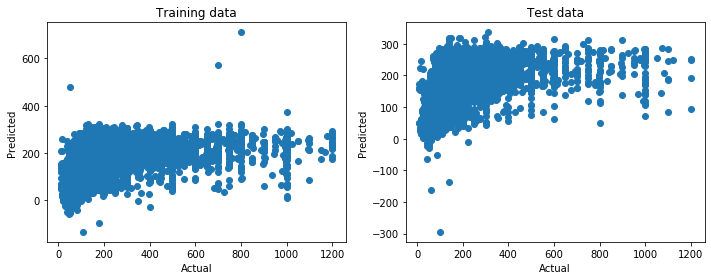

In [278]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
print("\033[1m Performance of training data\033[0m")
model_output(y_train,y_train_pred)
plt.title("Training data")

plt.subplot(1,2,2)
print("\033[1m Performance of test data \033[0m")
model_output(y_test,y_test_pred)
plt.title("Test data")
plt.tight_layout()




### 2) With transformation of Outcome variable¶
The model performed better after logtransformation of target variable(price).

In [280]:
y_train_log=np.log(y_train) # log transformation of price for training data
y_test_log= np.log(y_test) # log transformtion of price for test data

In [283]:
linear_log= LinearRegression().fit(X_train,y_train_log)
y_train_logpred= linear_log.predict(X_train)
y_tst_logpred=linear_log.predict(X_test)

 Performance of training data
r2 =  0.5615496531371134
mean_absolute_error =  0.3331011623359662
mean_squared_error =  0.19746664463535102
 Performance of test data 
r2 =  0.5619546569538254
mean_absolute_error =  0.3318158924536419
mean_squared_error =  0.19969202015304865


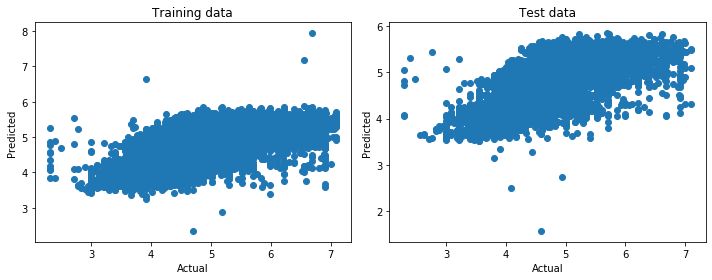

In [296]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
print("\033[1m Performance of training data\033[0m")
model_output(y_train_log, y_train_logpred)
plt.title("Training data")

plt.subplot(1,2,2)
print("\033[1m Performance of test data \033[0m")
model_output(y_test_log,y_tst_logpred)
plt.title("Test data")
plt.tight_layout()

### Decision Tree

In [309]:
# to select parameters using cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [326]:
dt_col=['neighbourhood', 'neighbourhood_group','minimum_nights','room_type', 'number_of_reviews', 'reviews_per_month', 
      'calculated_host_listings_count','availability_365', 'is_hotel', 'dist_nearest_SubwayStation',
      'dist_nearest_SubwayEntrance','dist_from_TimeSqr', 'dist_from_PennStation']

In [327]:
X_dt=ny_3std[dt_col]
X_dt.neighbourhood = X_dt["neighbourhood"].apply(lambda x: encoder_map[x]) # encode before spliting  


C:\Users\mgaya\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [329]:
X_dt.select_dtypes("object").head() # catagorical columns

,neighbourhood_group,room_type
0,Manhattan,Entire home/apt
1,Brooklyn,Entire home/apt
2,Manhattan,Entire home/apt
3,Brooklyn,Private room
4,Manhattan,Private room


In [323]:
y=ny_3std["price"]  # target,response variable

# split training and test data
X_dttrain, X_dttest, y_dttrain, y_dttest = train_test_split(X_dt, y,
test_size = 0.3, random_state=42)

In [335]:
len(y)

50352

In [334]:
len(X_dt.drop(["neighbourhood_group", "room_type"],axis=1))

50352

In [ ]:
dt= DecisionTreeRegressor()#criterion='mse',max_depth=10)
dt.fit(X_dt.drop(["neighbourhood_group", "room_type"], axis=1), y_train)

In [ ]:
grid_dt= GridSearchCV(estimator=dt, param_grid=[{"max_depth": np.arange(2,11)}],scoring='', cv= 4)
grid_dt.fit(X,y)

In [311]:
y_train_dtpred=dt.predict(X_train)
y_test_dtpred= dt.predict(X_test)

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
print("\033[1m Performance of training data\033[0m")
model_output(y_train, y_train_dtpred)
plt.title("Training data")

plt.subplot(1,2,2)
print("\033[1m Performance of test data \033[0m")
model_output(y_test,y_test_dtpred)
plt.title("Test data")
plt.tight_layout()

In [305]:
# make the tree graph
from sklearn.tree import export_graphviz

In [306]:
export_graphviz(dt, out_file="decisionTree.dot")